# Melbourne Housing Price Analysis 

### Abstract

We are looking to use a regression model to futher understand the Melbourne Housing Market and to predict the value of homes one year into the future.


In [20]:
import numpy as np 
import pandas as pd 
import time
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

mycolors = ["#771C19", "#AA3929", "#8E9CA3", "#556670", "#000000", \
            "#E25033", "#F27314", "#F8A31B", "#E2C59F", "#B6C5CC", \
            "#99CCCC","#FFCC99"]

%matplotlib inline

df_raw = pd.read_csv('./MELBOURNE_HOUSING_FULL.csv')
print(df_raw.shape)

# Define only two digits to display
pd.options.display.float_format = '{:,.2f}'.format

# Delete all missing price rows
df_raw = df_raw.dropna(subset=['Price'])


(34857, 21)


In [21]:
#Correlation Matrix, used look for collinearity and to discover what variables might be most important to price
corr = df_raw.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1,0.47,0.28,0.081,0.96,0.61,0.39,0.034,0.14,-0.0016,0.021,0.087,-0.08
Price,0.47,1,-0.21,0.045,0.43,0.43,0.2,0.033,0.1,-0.33,-0.22,0.2,-0.059
Distance,0.28,-0.21,1,0.49,0.28,0.14,0.24,0.055,0.077,0.31,-0.09,0.19,-0.022
Postcode,0.081,0.045,0.49,1,0.088,0.12,0.063,0.038,0.042,0.097,-0.22,0.36,0.023
Bedroom2,0.96,0.43,0.28,0.088,1,0.61,0.4,0.034,0.14,0.0079,0.019,0.091,-0.06
Bathroom,0.61,0.43,0.14,0.12,0.61,1,0.31,0.038,0.13,0.19,-0.047,0.1,-0.04
Car,0.39,0.2,0.24,0.063,0.4,0.31,1,0.031,0.094,0.13,0.002,0.039,-0.014
Landsize,0.034,0.033,0.055,0.038,0.034,0.038,0.031,1,0.38,0.041,0.024,-0.0036,-0.017
BuildingArea,0.14,0.1,0.077,0.042,0.14,0.13,0.094,0.38,1,0.073,0.026,-0.011,-0.026
YearBuilt,-0.0016,-0.33,0.31,0.097,0.0079,0.19,0.13,0.041,0.073,1,0.095,-0.022,0.023


Text(0.5, 1.0, 'Property Sales by Region')

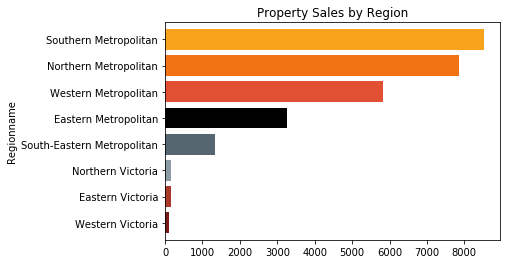

In [22]:
groupby_region = df_raw.groupby('Regionname')
regioncount = groupby_region['Price'].count().sort_values(ascending=True).plot(kind='barh',  width=.8,color=mycolors)
regioncount.set_title('Property Sales by Region')

Text(0.5, 1.0, 'Average Price by Region')

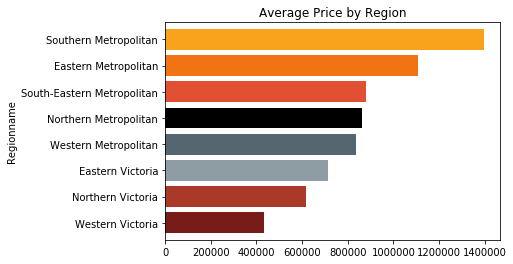

In [23]:
regionprice = groupby_region['Price'].mean().sort_values(ascending=True).plot(kind='barh', width=.8, color=mycolors)
regionprice.set_title('Average Price by Region')

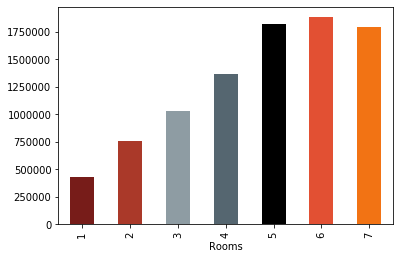

In [24]:
df_raw.groupby("Rooms").Price.mean()[0:7].plot.bar(color=mycolors)

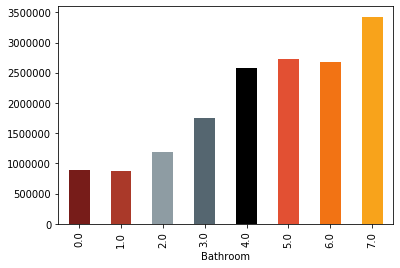

In [25]:
df_raw.groupby("Bathroom").Price.mean()[0:7].plot.bar(color=mycolors)

In [26]:
#check for duplicate data
duplicate = df_raw.duplicated()
duplicate.value_counts()

False    27247
dtype: int64

In [27]:
df_raw.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [28]:
# Data preprocessing

from sklearn.impute import SimpleImputer 

# Categroy variables
class_variable = [col for col in df_raw.columns if df_raw[col].dtypes == 'O']

# Numerical variables
numerical_variable = [col for col in df_raw.columns if df_raw[col].dtypes != 'O']
print('Catagory variables: %s' % class_variable, '\nNumerical variables: %s' % numerical_variable)

padding = SimpleImputer(strategy='mean')
# Fill the null numerical varibles with mean values
df_raw[numerical_variable] = padding.fit_transform(df_raw[numerical_variable])

# Fill the null category variables with None
df_raw[class_variable] = df_raw[class_variable].fillna('None')

# Convert Rooms, Bathroom, Car, YearBuilt to integer
df_raw[['Rooms', 'Bathroom', 'Car', 'YearBuilt']] = df_raw[['Rooms', 'Bathroom', 'Car', 'YearBuilt']].applymap(np.int64)

Catagory variables: ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname'] 
Numerical variables: ['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']


In [32]:
colsdrop = ['Propertycount', 'Lattitude', 'Longtitude', 'Bedroom2','SellerG','Method']
df_resultdrop=df_raw.drop(colsdrop,axis=1)
print (df_resultdrop)

           Suburb           Address  Rooms Type        Price        Date  \
1      Abbotsford      85 Turner St      2    h 1,480,000.00  03/12/2016   
2      Abbotsford   25 Bloomburg St      2    h 1,035,000.00  04/02/2016   
4      Abbotsford      5 Charles St      3    h 1,465,000.00  04/03/2017   
5      Abbotsford  40 Federation La      3    h   850,000.00  04/03/2017   
6      Abbotsford       55a Park St      4    h 1,600,000.00  04/06/2016   
...           ...               ...    ...  ...          ...         ...   
34852  Yarraville       13 Burns St      4    h 1,480,000.00  24/02/2018   
34853  Yarraville     29A Murray St      2    h   888,000.00  24/02/2018   
34854  Yarraville    147A Severn St      2    t   705,000.00  24/02/2018   
34855  Yarraville  12/37 Stephen St      3    h 1,140,000.00  24/02/2018   
34856  Yarraville  3 Tarrengower St      2    h 1,020,000.00  24/02/2018   

       Distance  Postcode  Bathroom  Car  Landsize  BuildingArea  YearBuilt  \
1       

In [44]:
# Create a working dataframe that only contains only houses.
df_working = df_resultdrop[(df_resultdrop.Type == 'h')]

In [45]:
df_working.head(5)

,Suburb,Address,Rooms,Type,Price,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname
1,Abbotsford,85 Turner St,2,h,"1,480,000.00",03/12/2016,2.50,"3,067.00",1,1,202.00,156.83,1966,Yarra City Council,Northern Metropolitan
2,Abbotsford,25 Bloomburg St,2,h,"1,035,000.00",04/02/2016,2.50,"3,067.00",1,0,156.00,79.00,1900,Yarra City Council,Northern Metropolitan
4,Abbotsford,5 Charles St,3,h,"1,465,000.00",04/03/2017,2.50,"3,067.00",2,0,134.00,150.00,1900,Yarra City Council,Northern Metropolitan
5,Abbotsford,40 Federation La,3,h,"850,000.00",04/03/2017,2.50,"3,067.00",2,1,94.00,156.83,1966,Yarra City Council,Northern Metropolitan
6,Abbotsford,55a Park St,4,h,"1,600,000.00",04/06/2016,2.50,"3,067.00",1,2,120.00,142.00,2014,Yarra City Council,Northern Metropolitan


In [46]:
# obtiain descriptive statistics to the above dataset
df_working.describe ()

,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt
count,"18,472.00","18,472.00","18,472.00","18,472.00","18,472.00","18,472.00","18,472.00","18,472.00","18,472.00"
mean,3.32,"1,203,718.50",12.35,"3,116.32",1.56,1.71,634.22,164.60,"1,962.72"
std,0.85,"687,939.50",7.14,125.60,0.71,1.02,"3,635.37",335.65,26.12
min,1.00,"131,000.00",1.20,"3,000.00",0.00,0.00,0.00,0.00,"1,196.00"
25%,3.00,"746,000.00",7.50,"3,044.00",1.00,1.00,459.00,156.83,"1,965.00"
50%,3.00,"1,015,000.00",11.20,"3,084.00",1.00,2.00,593.49,156.83,"1,966.00"
75%,4.00,"1,450,000.00",14.90,"3,149.00",2.00,2.00,646.00,156.83,"1,966.00"
max,16.00,"11,200,000.00",48.10,"3,978.00",9.00,18.00,"433,014.00","44,515.00","2,019.00"


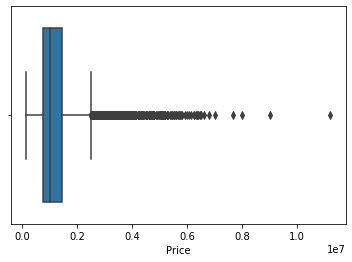

In [47]:
sns.boxplot(x=df_working['Price'])

In [48]:
#formula used to calculate the interquartile range of data
Q1 = df_working.Price.quantile(0.25)
Q3 = df_working.Price.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

704000.0


In [49]:
# Functions to calculate the upper and lower limits that will define outliers 
upIQR = Q3+(IQR*1.5)
lowIQR = Q1-(IQR*1.5)
print(upIQR)
print (lowIQR)

2506000.0
-310000.0


In [50]:
# Formula to drop all outliers from dataset.   
df_working2=df_working.drop(df_working[(df_working.Price>upIQR)|(df_working.Price<lowIQR)].index)



In [51]:
datasummary = df_working2.describe()
datasummary.transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,"17,590.00",3.28,0.82,1.00,3.00,3.00,4.00,12.00
Price,"17,590.00","1,097,397.57","467,733.84","131,000.00","731,250.00","990,000.00","1,375,000.00","2,505,000.00"
Distance,"17,590.00",12.58,7.21,1.20,7.70,11.40,15.40,48.10
Postcode,"17,590.00","3,115.47",128.29,"3,000.00","3,043.00","3,081.00","3,149.00","3,978.00"
Bathroom,"17,590.00",1.52,0.66,0.00,1.00,1.00,2.00,9.00
Car,"17,590.00",1.69,1.01,0.00,1.00,2.00,2.00,18.00
Landsize,"17,590.00",605.16,"1,799.98",0.00,450.25,593.49,637.00,"146,699.00"
BuildingArea,"17,590.00",161.65,342.29,0.00,156.00,156.83,156.83,"44,515.00"
YearBuilt,"17,590.00","1,963.11",25.53,"1,196.00","1,966.00","1,966.00","1,966.00","2,019.00"


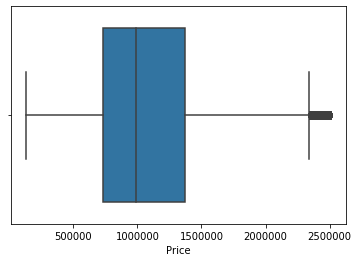

In [52]:
#New boxplot with outliers removed.   
sns.boxplot(x=df_working2['Price'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EF9A2A9A88>,
      dtype=object)

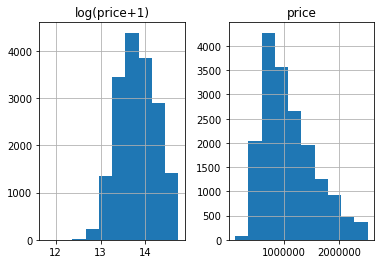

In [59]:
prices = pd.DataFrame({"price":df_working2.Price, "log(price+1)":np.log1p(df_working2.Price)})
prices.hist()

In [60]:
# Additional Data Pre-processing on dataset

df_new = df_working2[['Rooms', 'Price', 'Distance', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt']].copy()
# Convert to date format
df_new.loc[:,'Date'] = pd.to_datetime(df_working2['Date'])
# Extract year from Date
df_new.loc[:,'Year'] = pd.DatetimeIndex(df_new.Date).year
# The years between the predicted and the estimated, we assume the predicted years is 2019
df_new.loc[:,'N'] = 2019 - df_new.Year
# The age of house
df_new.loc[:,'Age'] =  df_new.Year - df_new.YearBuilt
# Numericalize the category futures
df_new.loc[:,'Suburb'] = df_working2.Suburb.astype('category').cat.codes
df_new.loc[:,'Type'] = df_working2.Type.astype('category').cat.codes
df_new.loc[:,'CouncilArea'] = df_working2.CouncilArea.astype('category').cat.codes
df_new.loc[:,'Regionname'] = df_working2.Regionname.astype('category').cat.codes
df_new.head(5)

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Date,Year,N,Age,Suburb,Type,CouncilArea,Regionname
1,2,"1,480,000.00",2.50,1,1,202.00,156.83,1966,2016-03-12,2016,3,50,0,0,32,3
2,2,"1,035,000.00",2.50,1,0,156.00,79.00,1900,2016-04-02,2016,3,116,0,0,32,3
4,3,"1,465,000.00",2.50,2,0,134.00,150.00,1900,2017-04-03,2017,2,117,0,0,32,3
5,3,"850,000.00",2.50,2,1,94.00,156.83,1966,2017-04-03,2017,2,51,0,0,32,3
6,4,"1,600,000.00",2.50,1,2,120.00,142.00,2014,2016-04-06,2016,3,2,0,0,32,3


In [168]:
from sklearn.model_selection import train_test_split

df_train = df_new[['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', \
                   'Age', 'Type']].copy()

df_target = np.log1p(df_new.Price)

validation_size = 0.15

x_train, x_test, y_train, y_test = train_test_split(df_train, df_target, test_size=validation_size)

In [169]:
# Linear regression model test
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

lreg.fit(x_train,y_train)

pred_cv = lreg.predict(x_test)

mse = np.mean((pred_cv - y_test)**2)

print('The Linear regression mse:{0: .4f}'.format(mse))

train_score = lreg.score(x_train,y_train)
test_score = lreg.score(x_test,y_test)
print('train score:{0:.4f} test score:{0:.4f}'.format(train_score,test_score))

The Linear regression mse: 0.1071
train score:0.3838 test score:0.3838


In [170]:
# Elastic Net regression model test
from sklearn.linear_model import ElasticNet


ENreg = ElasticNet(alpha=1, l1_ratio=0.5, normalize=False)

ENreg.fit(x_train,y_train)

pred_cv = ENreg.predict(x_test)

mse = np.mean((pred_cv - y_test)**2)

print('The Elastic Net regression mse:{0: .4f}'.format(mse))

train_score = ENreg.score(x_train,y_train)
test_score = ENreg.score(x_test,y_test)

print('train score:{0:.4f} test score:{0:.4f}'.format(train_score,test_score))


The Elastic Net regression mse: 0.1379
train score:0.2132 test score:0.2132


In [174]:
# Random Forest regression model test
from sklearn.ensemble import RandomForestRegressor

RandForestReg = RandomForestRegressor(n_estimators=10, random_state=7)

RandForestReg.fit(x_train,y_train)

pred_cv = RandForestReg.predict(x_test)

mse = np.mean((pred_cv - y_test)**2)

print('The Random Forest mse:{0: .4f}'.format(mse))
      
train_score = RandForestReg.score(x_train,y_train)
test_score = RandForestReg.score(x_test,y_test)

print('train score:{0:.4f} test score:{0:.4f}'.format(train_score,test_score))

The Random Forest mse: 0.0611
train score:0.9003 test score:0.9003


In [175]:
pred_cv = RandForestReg.predict(df_train)
pred_price = np.expm1(pred_cv)
df_pred = pd.DataFrame(pred_price, columns=['PredictedPrice'])
df_pred = pd.concat([df_working2, df_pred], axis=1)
df_pred['PriceChange'] = (df_pred['PredictedPrice'] - df_new.Price)/ df_new.N
df_pred.drop(['Suburb', 'Address', 'Postcode', 'Date', 'Price', 'CouncilArea'], axis = 1, inplace = True)

In [176]:
# Display the top 10 valuable property
df_result = df_pred.sort_values(by ='PriceChange', ascending=False)
df_result.head(10)

,Rooms,Type,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,PredictedPrice,PriceChange
16896,3.00,h,19.60,2.00,1.00,606.00,111.04,"2,005.00",Northern Metropolitan,"2,216,938.30","875,969.15"
16399,3.00,h,25.90,1.00,1.00,593.49,156.83,"1,966.00",Northern Metropolitan,"2,163,614.27","861,807.14"
13781,3.00,h,13.50,1.00,2.00,701.00,156.83,"1,966.00",Western Metropolitan,"2,423,012.31","861,506.15"
14370,3.00,h,28.80,1.00,1.00,593.49,156.83,"1,966.00",South-Eastern Metropolitan,"2,302,458.20","861,229.10"
1715,3.00,h,10.80,1.00,1.00,593.49,156.83,"1,966.00",Western Metropolitan,"2,262,470.28","826,235.14"
8436,3.00,h,11.20,2.00,2.00,215.00,146.00,"2,003.00",Northern Metropolitan,"2,147,004.24","803,502.12"
12193,3.00,h,10.50,1.00,1.00,585.00,99.00,"1,960.00",Western Metropolitan,"2,354,952.76","797,476.38"
16018,3.00,h,14.70,1.00,1.00,575.00,156.83,"1,966.00",Western Metropolitan,"2,034,011.04","796,005.52"
12628,2.00,h,7.80,1.00,2.00,0.00,64.00,"1,980.00",Northern Metropolitan,"2,255,808.20","789,016.10"
16298,3.00,h,16.10,2.00,2.00,563.00,156.83,"1,966.00",Northern Metropolitan,"2,307,807.14","788,903.57"


In [177]:
# Display the top 10 largest losses
df_result = df_result.sort_values(by ='PriceChange', ascending=True)df_result.head(10)

,Rooms,Type,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,PredictedPrice,PriceChange
5925,4.00,h,5.60,2.00,0.00,364.00,183.00,"1,900.00",Southern Metropolitan,"309,330.23","-1,002,834.88"
14568,4.00,h,3.50,3.00,2.00,210.00,210.00,"2,010.00",Southern Metropolitan,"465,524.33","-992,237.83"
15424,5.00,h,10.20,1.00,1.00,593.49,156.83,"1,966.00",Southern Metropolitan,"525,576.96","-987,211.52"
14503,4.00,h,10.20,2.00,5.00,728.00,156.83,"1,966.00",Eastern Metropolitan,"425,999.31","-947,000.34"
17338,5.00,h,10.20,2.00,0.00,739.00,266.53,"1,927.00",Southern Metropolitan,"637,227.97","-933,886.01"
16115,4.00,h,10.30,1.00,1.00,593.49,156.83,"1,966.00",Southern Metropolitan,"605,786.32","-922,106.84"
15517,5.00,h,7.70,3.00,2.00,844.00,203.00,"1,920.00",Southern Metropolitan,"551,469.65","-904,765.18"
14723,3.00,h,6.30,1.00,0.00,256.00,130.00,"1,910.00",Southern Metropolitan,"586,469.24","-899,265.38"
2766,5.00,h,7.80,1.00,1.00,593.49,156.83,"1,966.00",Southern Metropolitan,"509,509.23","-895,245.38"
13251,5.00,h,6.90,2.00,2.00,597.00,322.00,"1,930.00",Western Metropolitan,"511,739.05","-894,130.47"


In [178]:
#Average change accross all homes in the dataset.  
print('The average change in price for homes in Melbourne is: {0: .2f}'.format(df_result['PriceChange'].mean()))

The average change in price for homes in Melbourne is: -32766.55


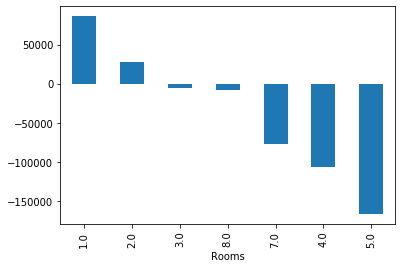

In [162]:
df_result.groupby("Rooms").PriceChange.mean().sort_values(ascending=False)[:5].plot.bar()

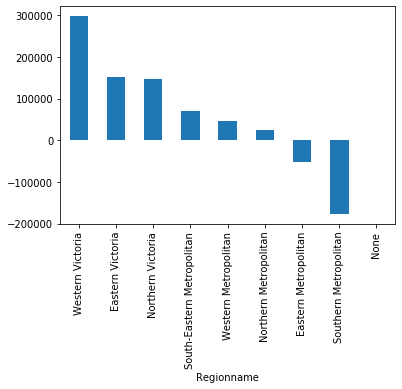

In [163]:
df_result.groupby("Regionname").PriceChange.mean().sort_values(ascending=False)[:10].plot.bar()